In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


In [2]:
df1= pd.read_csv("../raw_data/gamesfeatures.csv")

In [3]:
df2 = pd.read_csv("../raw_data/93182_steam_games_am.csv")

/tmp/ipykernel_484993/3384779910.py:1: DtypeWarning: Columns (3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../raw_data/93182_steam_games_am.csv")


In [4]:
games_may2024= pd.read_csv('../raw_data/games_may2024_cleaned.csv')

In [5]:
steamchart= pd.read_csv("../raw_data/SteamCharts.csv",encoding='ISO-8859-1')

# Clean and process data

## 93182_steam_games clean and process

In [6]:
# drop_col['Score rank', 'Metacritic url', 'Reviews', "Tags", 'nots', "Estimated owners", 'Website', 'Support url', 'Support email', 'Movies', 'About the game', 'Screenshots']
# drop_row['Name','Publishers', 'Categories','Genres','Developers']

In [7]:
df2.isnull().sum().sort_values(ascending=False)

Score rank                    93175
Metacritic url                89159
Reviews                       82583
Tags                          80264
Notes                         77842
Estimated owners              76720
Website                       51528
Support url                   48947
Support email                 15832
Movies                         7647
Categories                     5295
Publishers                     5269
Developers                     4831
Genres                         4801
About the game                 4790
Screenshots                    2813
Name                              3
Median playtime two weeks         0
Median playtime forever           0
Average playtime two weeks        0
Average playtime forever          0
Recommendations                   0
Achievements                      0
AppID                             0
Negative                          0
Positive                          0
User score                        0
Linux                       

In [8]:
df2["Release date"]= pd.to_datetime(df2['Release date'], errors= 'coerce' )

In [9]:
df2['year'] = df2['Release date'].dt.year
df2['month'] = df2['Release date'].dt.month
df2['day'] = df2['Release date'].dt.day

In [10]:
df2['Price'].value_counts()

0.00     18473
4.99      9760
9.99      8363
0.99      8326
1.99      6361
         ...  
30.14        1
5.82         1
62.99        1
2.62         1
5.11         1
Name: Price, Length: 572, dtype: int64

In [11]:
# The peak number of concurrent users (CCU) playing the game in the last 24 hours.
df2['Peak CCU'].value_counts()

0        89671
1         1151
2          448
3          220
4          176
         ...  
112          1
26854        1
4967         1
1894         1
2795         1
Name: Peak CCU, Length: 404, dtype: int64

In [12]:
# drop unnseccry columns and missing value in rows for other columns
df2 = df2.drop(columns=['Score rank', 'Metacritic url', 'Reviews', 'Tags', 'Notes',
                      'Estimated owners', 'Website', 'Support url', 'Support email',
                      'Movies', 'About the game', 'Screenshots',"Average playtime forever","Average playtime two weeks",
                        "Median playtime forever", "Median playtime two weeks",
                      "Full audio languages","Header image", "User score","Negative","Positive",
                      'Peak CCU'])
df2 = df2.dropna(subset=['Name', 'Publishers', 'Categories', 'Genres', 'Developers', 'Release date'])

In [13]:
# Description: The number of downloadable content (DLC) packs available for the game. If the value is 0, there are no DLCs.
df2["DLC count"].value_counts()

0       72893
1        8885
2        2268
3         894
4         470
        ...  
203         1
182         1
316         1
3260        1
92          1
Name: DLC count, Length: 106, dtype: int64

In [14]:
df2

,AppID,Name,Release date,Required age,Price,DLC count,Supported languages,Windows,Mac,Linux,Metacritic score,Achievements,Recommendations,Developers,Publishers,Categories,Genres,year,month,day
0,1424640,余烬,2020-10-03,0,3.99,0,['Simplified Chinese'],True,False,False,0,44,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG",2020,10,3
1,402890,Nyctophilia,2015-09-23,0,0.00,0,"['English', 'Russian']",True,False,False,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie",2015,9,23
2,1151740,Prison Princess,2020-04-02,0,19.99,0,"['English', 'Simplified Chinese', 'Traditional...",True,False,False,0,21,299,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie",2020,4,2
3,875530,Dead In Time,2018-10-12,0,7.99,0,"['English', 'Russian']",True,False,False,0,6,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie",2018,10,12
4,1835360,Panacle: Back To Wild,2022-03-11,0,3.99,0,"['English', 'Japanese', 'Simplified Chinese', ...",True,False,False,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access",2022,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93177,2251030,Mutant Monty (C64/CPC/Spectrum),2023-01-05,0,4.99,0,['English'],True,False,False,0,0,0,Artic Computing,Pixel Games UK,"Single-player,Partial Controller Support,Steam...",Action,2023,1,5
93178,1330890,Crystal Caves HD,2020-10-15,0,7.99,0,['English'],True,False,True,0,32,270,Emberheart Games,Apogee Entertainment,"Single-player,Steam Achievements,Full controll...",Action,2020,10,15
93179,1844230,Malicious ReloadⅡ,2023-09-05,0,5.99,0,"['Japanese', 'English', 'Simplified Chinese', ...",True,False,False,0,0,0,UNDER HILL,Playmeow,"Single-player,Family Sharing","Action,Adventure,Simulation",2023,9,5
93180,2623690,Mutant Frog,2024-01-27,0,0.99,0,['English'],True,False,False,0,0,0,Run-O Games,Run-O Games,"Single-player,Family Sharing","Action,Adventure,Casual,Indie",2024,1,27


In [15]:
# Categories encoded one -hot

In [16]:
df2['Genres'].value_counts()

Casual,Indie                                                                                 5003
Action,Indie                                                                                 4684
Action,Adventure,Indie                                                                       4077
Adventure,Indie                                                                              3375
Adventure,Casual,Indie                                                                       2801
                                                                                             ... 
Nudity,Action,Casual                                                                            1
Action,Adventure,Free To Play,Racing,Early Access                                               1
Action,Indie,Racing,Free To Play,Early Access                                                   1
Action,Adventure,Casual,Indie,Massively Multiplayer,Racing,Simulation,Sports,Early Access       1
Action,Indie,RPG,Sim

In [17]:
# Step 1: Split the 'Genres' column into separate genres and remove any leading/trailing spaces
df2['Genres_split'] = df2['Genres'].str.split(',')

# Step 2: Create new binary columns for each unique genre using One-Hot Encoding
# This will create a binary column (1 or 0) for each unique genre
df_genres_expanded = df2['Genres_split'].apply(lambda genres: pd.Series(1, index=genres)).fillna(0)

# Step 3: Merge the expanded genres DataFrame back into the original DataFrame
df_final = pd.concat([df2, df_genres_expanded], axis=1)

# Step 4: Drop the intermediate 'Genres_split' column (optional)
df_final.drop(columns=['Genres_split'], inplace=True)

In [18]:
df_final.columns

Index(['AppID', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Supported languages', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Developers', 'Publishers',
       'Categories', 'Genres', 'year', 'month', 'day', 'Adventure', 'Casual',
       'Indie', 'RPG', 'Free To Play', 'Action', 'Strategy', 'Early Access',
       'Simulation', 'Racing', 'Sports', 'Massively Multiplayer', 'Education',
       'Game Development', 'Violent', 'Utilities', 'Audio Production', 'Gore',
       'Design & Illustration', 'Video Production', 'Sexual Content', 'Nudity',
       'Photo Editing', 'Web Publishing', 'Animation & Modeling',
       'Software Training', 'Accounting', 'Movie', 'Documentary', 'Episodic',
       'Short', 'Tutorial', '360 Video'],
      dtype='object')

In [19]:
df_final["Categories"].value_counts()

Single-player,Family Sharing                                                                                                                                                                                                                             19118
Single-player,Steam Achievements,Family Sharing                                                                                                                                                                                                           7628
Single-player                                                                                                                                                                                                                                             3472
Single-player,Steam Achievements,Steam Cloud,Family Sharing                                                                                                                                                                                

In [20]:
# Step 1: Split the 'Categories' column by commas and remove leading/trailing spaces
df_final['Categories_split'] = df_final['Categories'].str.split(',')

# Step 2: Apply one-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
categories_encoded = mlb.fit_transform(df_final['Categories_split'])

# Step 3: Convert the encoded categories back into a DataFrame
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)

# Step 4: Merge the encoded categories DataFrame with the original DataFrame
df_final = df_final.merge(categories_df, left_index=True, right_index=True)
# Step 5: Drop the intermediate 'Categories_split' column (optional)
df_final.drop(columns=['Categories_split'], inplace=True)

In [21]:
df_final.head()

,AppID,Name,Release date,Required age,Price,DLC count,Supported languages,Windows,Mac,Linux,...,Steam Timeline,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Controller Support,VR Only,VR Support,VR Supported,Valve Anti-Cheat enabled
0,1424640,余烬,2020-10-03,0,3.99,0,['Simplified Chinese'],True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,402890,Nyctophilia,2015-09-23,0,0.00,0,"['English', 'Russian']",True,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1151740,Prison Princess,2020-04-02,0,19.99,0,"['English', 'Simplified Chinese', 'Traditional...",True,False,False,...,0,0,0,0,0,0,0,0,0,0
3,875530,Dead In Time,2018-10-12,0,7.99,0,"['English', 'Russian']",True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1835360,Panacle: Back To Wild,2022-03-11,0,3.99,0,"['English', 'Japanese', 'Simplified Chinese', ...",True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_final['Required age'].value_counts()

0     79981
17      693
13      150
18      148
16       31
12       22
10       22
3         6
7         5
15        3
6         3
5         1
14        1
20        1
1         1
21        1
Name: Required age, dtype: int64

In [23]:
def age_ranking(age):
    if age == 0:
        return 4
    elif 1 <= age <= 12:
        return 1
    elif 13 <= age <= 17:
        return 2
    elif age >= 18:
        return 3
    else:
        return None

df_final['age_ranking'] = df_final['Required age'].apply(age_ranking)

## games-features clean and process

In [24]:
df1.shape

(13357, 78)

In [25]:
df1.isnull().sum().sort_values(ascending=False)

Unnamed: 21        13357
Unnamed: 11        13357
Unnamed: 25        13357
Unnamed: 20        13357
Unnamed: 23        13357
                   ...  
PCReqsHaveMin          0
PlatformMac            0
PlatformLinux          0
PlatformWindows        0
MacRecReqsText         0
Length: 78, dtype: int64

In [26]:
df1= df1.drop(columns=['CategoryIncludeSrcSDK', 'CategoryInAppPurchase', 'CategoryVRSupport', 'GenreIsNonGame', 'CategoryMMO',
                             'CategoryIncludeLevelEditor', 'LinuxReqsHaveRec','MacReqsHaveRec','PlatformLinux','LinuxReqsHaveMin',
                             'PlatformMac','MacReqsHaveMin','MovieCount','ScreenshotCount','Website','HeaderImage','LegalNotice','Reviews',
                             'SupportedLanguages','MacMinReqsText','LinuxRecReqsText','DRMNotice','LinuxMinReqsText','ExtUserAcctNotice',
                             'Background','AboutText','SupportURL','SupportEmail','MacRecReqsText'])

In [27]:
df1 = df1.dropna(subset=['QueryName'])

In [28]:
df_final_2=df1.copy()

In [29]:
df1.isnull().sum().sort_values(ascending=False)

Unnamed: 25                    13356
Unnamed: 23                    13356
Unnamed: 21                    13356
Unnamed: 20                    13356
Unnamed: 11                    13356
QueryID                            0
GenreIsSimulation                  0
CategoryCoop                       0
GenreIsIndie                       0
GenreIsAction                      0
GenreIsAdventure                   0
GenreIsCasual                      0
GenreIsStrategy                    0
GenreIsRPG                         0
GenreIsEarlyAccess                 0
CategorySinglePlayer               0
GenreIsFreeToPlay                  0
GenreIsSports                      0
GenreIsRacing                      0
GenreIsMassivelyMultiplayer        0
PriceCurrency                      0
PriceInitial                       0
PriceFinal                         0
ShortDescrip                       0
DetailedDescrip                    0
PCMinReqsText                      0
CategoryMultiplayer                0
P

In [30]:
df_final_2.shape

(13356, 49)

## games_may2024_cleaned clean and process

In [31]:
games_may2024.shape

(83646, 46)

In [32]:
games_may2024.isnull().sum().sort_values(ascending=False)

score_rank                  83605
metacritic_url              79706
reviews                     73363
notes                       69437
website                     43886
support_url                 41557
support_email               10576
about_the_game                188
detailed_description          166
short_description             109
name                            3
negative                        0
AppID                           0
positive                        0
user_score                      0
movies                          0
estimated_owners                0
median_playtime_2weeks          0
average_playtime_forever        0
average_playtime_2weeks         0
median_playtime_forever         0
genres                          0
peak_ccu                        0
tags                            0
pct_pos_total                   0
num_reviews_total               0
pct_pos_recent                  0
screenshots                     0
full_audio_languages            0
categories    

In [33]:
games_may2024= games_may2024.drop(columns=['average_playtime_2weeks', 'metacritic_url','website', 'notes','reviews', 'support_url',
                                           'support_email','short_description','detailed_description', 'user_score','movies','median_playtime_2weeks',
                                           'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever',
                                           'peak_ccu','header_image','metacritic_score', 'metacritic_score', 'full_audio_languages', 'screenshots',
                                           'score_rank'])
games_may2024= games_may2024.dropna(subset=['about_the_game', 'name'])

In [34]:
games_may2024["release_date"]= pd.to_datetime(games_may2024['release_date'], errors= 'coerce' )
games_may2024['year'] = games_may2024['release_date'].dt.year
games_may2024['month'] = games_may2024['release_date'].dt.month
games_may2024['day'] = games_may2024['release_date'].dt.day

In [35]:
games_may2024.dtypes

AppID                           int64
name                           object
release_date           datetime64[ns]
required_age                    int64
price                         float64
dlc_count                       int64
about_the_game                 object
windows                          bool
mac                              bool
linux                            bool
achievements                    int64
recommendations                 int64
supported_languages            object
packages                       object
developers                     object
publishers                     object
categories                     object
genres                         object
positive                        int64
negative                        int64
estimated_owners               object
tags                           object
pct_pos_total                   int64
num_reviews_total               int64
pct_pos_recent                  int64
num_reviews_recent              int64
year        

In [36]:
games_may2024['rating'] = (games_may2024['positive'] / (games_may2024['positive'] + games_may2024['negative'])) * 100


In [37]:
games_may2024.isnull().sum().sort_values(ascending=False)

rating                 13857
name                       0
day                        0
month                      0
year                       0
num_reviews_recent         0
pct_pos_recent             0
num_reviews_total          0
pct_pos_total              0
tags                       0
estimated_owners           0
negative                   0
positive                   0
genres                     0
categories                 0
AppID                      0
developers                 0
packages                   0
supported_languages        0
recommendations            0
achievements               0
linux                      0
mac                        0
windows                    0
about_the_game             0
dlc_count                  0
price                      0
required_age               0
release_date               0
publishers                 0
dtype: int64

In [38]:
import numpy as np
games_may2024['TotalReviews'] = games_may2024['positive'] + games_may2024['negative']

games_may2024['ReviewScore'] = games_may2024['positive'] / games_may2024['TotalReviews']

# Calculate custom rating based on the given formula
games_may2024['CustomRating'] = games_may2024['ReviewScore'] - (
    (games_may2024['ReviewScore'] - 0.5) * 2
) - np.log10(games_may2024['TotalReviews'] + 1)

# Group by AppID, year, month, and day to calculate the rating for each day
daily_ratings = games_may2024.groupby(['AppID', 'year', 'month', 'day']).agg({
    'positive': 'sum',
    'negative': 'sum',
    'TotalReviews': 'sum',
    'ReviewScore': 'mean',
    'CustomRating': 'mean'
}).reset_index()

# Display the daily ratings with relevant columns
daily_ratings[['AppID', 'year', 'month', 'day', 'CustomRating']]


,AppID,year,month,day,CustomRating
0,10,2000,11,1,-5.349292
1,20,1999,4,1,-3.779629
2,30,2003,5,1,-3.731648
3,40,2001,6,1,-3.296144
4,50,1999,11,1,-4.295354
...,...,...,...,...,...
83452,2979110,2024,5,24,-0.845098
83453,2980150,2024,5,14,NaN
83454,2981690,2024,5,22,NaN
83455,2983950,2024,5,23,NaN


In [39]:
games_may2024= games_may2024.dropna(subset=['ReviewScore', 'CustomRating','rating'])

In [40]:
daily_ratings.shape

(83457, 9)

In [41]:
daily_ratings.isnull().sum()

AppID               0
year                0
month               0
day                 0
positive            0
negative            0
TotalReviews        0
ReviewScore     13857
CustomRating    13857
dtype: int64

In [42]:
daily_ratings= daily_ratings.dropna(subset=['ReviewScore', 'CustomRating'])
games_may2024= games_may2024.dropna(subset=['rating'])

In [43]:
daily_ratings.shape

(69600, 9)

## SteamCharts clean and process

In [44]:
steamchart

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%
...,...,...,...,...,...,...,...
83784,Steel Division: Normandy 44,2017,July,421.60,-485.13,987,42.7153%
83785,Steel Division: Normandy 44,2017,June,906.74,-231.92,2584,35.0906%
83786,Steel Division: Normandy 44,2017,May,1138.66,415.61,4606,24.7212%
83787,Steel Division: Normandy 44,2017,April,723.05,720.21,1911,37.8362%


In [45]:
steamchart.shape

(83789, 7)

In [46]:
steamchart.isnull().sum().sort_values(ascending=False)

gain             1260
gamename            0
year                0
month               0
avg                 0
peak                0
avg_peak_perc       0
dtype: int64

In [47]:
steamchart=steamchart.dropna(subset=['gain'])

In [48]:
steamchart.isnull().sum().sort_values(ascending=False)

gamename         0
year             0
month            0
avg              0
gain             0
peak             0
avg_peak_perc    0
dtype: int64

In [49]:
steamchart.dtypes

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc     object
dtype: object

In [50]:
steamchart[['avg_peak_perc']]

,avg_peak_perc
0,65.9567%
1,66.0893%
2,61.646%
3,64.4605%
4,65.0156%
...,...
83783,47.401%
83784,42.7153%
83785,35.0906%
83786,24.7212%


In [51]:
steamchart['avg_peak_perc'] = steamchart['avg_peak_perc'].str.rstrip('%').astype(float)
steamchart['avg_peak_perc'] = steamchart['avg_peak_perc'] / 100


/tmp/ipykernel_484993/1496661087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steamchart['avg_peak_perc'] = steamchart['avg_peak_perc'].str.rstrip('%').astype(float)
/tmp/ipykernel_484993/1496661087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steamchart['avg_peak_perc'] = steamchart['avg_peak_perc'] / 100


In [52]:
steamchart.dtypes

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc    float64
dtype: object

In [53]:
steamchart[['avg_peak_perc']]

,avg_peak_perc
0,0.659567
1,0.660893
2,0.616460
3,0.644605
4,0.650156
...,...
83783,0.474010
83784,0.427153
83785,0.350906
83786,0.247212


In [54]:
steamchart.shape

(82529, 7)

## games mareg games feture for Metacritic

In [55]:
con = df_final['Metacritic score'] != 0
df_filterd_gamesfeatures_df = df_final.loc[con, ['Name','Metacritic score']]
df_filterd_gamesfeatures_df

,Name,Metacritic score
8,Shadow Empire,78
46,SENRAN KAGURA SHINOVI VERSUS,70
57,SpaceChem,84
80,Tannenberg,69
115,Total Annihilation,86
...,...,...
86843,Blueberry Garden,68
86868,I Can't Escape: Darkness,43
86869,15 Days,63
86879,Mars Horizon,71


## mareged 3DS

In [56]:
# # Renaming the price columns to a common name 'Price'
df_final.rename(columns={'Price': 'Price'}, inplace=True) # Already named 'Price'
df_final_2.rename(columns={'PriceFinal': 'Price'}, inplace=True)
df_final_2.rename(columns={'QueryID': 'AppID'}, inplace=True)
games_may2024.rename(columns={'price': 'Price'}, inplace=True)

In [57]:
merged_df = pd.merge(df_final_2, df_final, on='AppID', how='left')
final_merged_df = pd.merge(merged_df, games_may2024, on='AppID', how='left')
final_merged_df.head()

,AppID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,num_reviews_total,pct_pos_recent,num_reviews_recent,year_y,month_y,day_y,rating,TotalReviews,ReviewScore,CustomRating
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,149589.0,95.0,908.0,2000.0,11.0,1.0,97.458003,236979.0,0.974580,-5.349292
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,6045.0,89.0,64.0,1999.0,4.0,1.0,86.873772,8144.0,0.868738,-3.779629
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,4038.0,97.0,36.0,2003.0,5.0,1.0,90.150843,6762.0,0.901508,-3.731648
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,2120.0,95.0,21.0,2001.0,6.0,1.0,82.588076,2952.0,0.825881,-3.296144
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,18994.0,95.0,269.0,1999.0,11.0,1.0,95.188645,22052.0,0.951886,-4.295354


In [58]:
final_merged_df['tags']
final_merged_df['tags'].apply(pd.Series)

,0
0,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3..."
1,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277..."
2,"{'FPS': 798, 'World War II': 270, 'Multiplayer..."
3,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M..."
4,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S..."
...,...
13351,"{'Casual': 33, 'Indie': 31, 'Sports': 31, 'Act..."
13352,"{'Clicker': 206, 'Puzzle': 200, 'Match 3': 196..."
13353,NaN
13354,NaN


In [59]:
import ast
df_tags = final_merged_df['tags'].fillna('{}')
df_tags = df_tags.apply(eval)
df_tags

0        {'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...
1        {'Action': 763, 'FPS': 327, 'Multiplayer': 277...
2        {'FPS': 798, 'World War II': 270, 'Multiplayer...
3        {'Action': 635, 'FPS': 150, 'Classic': 115, 'M...
4        {'FPS': 916, 'Action': 350, 'Classic': 281, 'S...
                               ...                        
13351    {'Casual': 33, 'Indie': 31, 'Sports': 31, 'Act...
13352    {'Clicker': 206, 'Puzzle': 200, 'Match 3': 196...
13353                                                   {}
13354                                                   {}
13355    {'Casual': 22, 'Adventure': 21, 'Indie': 21, '...
Name: tags, Length: 13356, dtype: object

In [60]:
df_tags.apply(pd.Series).fillna(0)

/tmp/ipykernel_484993/3015061081.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tags.apply(pd.Series).fillna(0)
/tmp/ipykernel_484993/3015061081.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tags.apply(pd.Series).fillna(0)
/tmp/ipykernel_484993/3015061081.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tags.apply(pd.Series).fillna(0)
/tmp/ipykernel_484993/3015061081.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tags.apply(pd.Series).fillna(0)
/tmp/ipykernel_484993/3015061081.py:1: FutureWarning

,Action,FPS,Multiplayer,Shooter,Classic,Team-Based,First-Person,Competitive,Tactical,1990's,...,Asymmetric VR,Tennis,Faith,Cozy,BMX,Hardware,Foreign,360 Video,Rock Music,Volleyball
0,5472.0,4897.0,3444.0,3394.0,2822.0,1896.0,1736.0,1631.0,1370.0,1231.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,763.0,327.0,277.0,221.0,252.0,201.0,186.0,82.0,0.0,157.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,164.0,798.0,212.0,193.0,130.0,137.0,108.0,0.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,635.0,150.0,106.0,100.0,115.0,0.0,80.0,30.0,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,350.0,916.0,0.0,243.0,281.0,0.0,214.0,0.0,0.0,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
final_merged_df['Sales'] = final_merged_df['SteamSpyOwners'] * final_merged_df['Price']
pd.options.display.float_format = '{:.2f}'.format
# Check the final dataframe with sales estimates
final_merged_df[['AppID', 'SteamSpyOwners', 'Price', 'Sales']].head()

,AppID,SteamSpyOwners,Price,Sales
0,10,13033334,9.99,130203006.66
1,20,5399140,4.99,26941708.60
2,30,7621102,4.99,38029298.98
3,40,7498965,4.99,37419835.35
4,50,5399499,4.99,26943500.01


In [62]:
final_merged_df.shape

(13356, 177)

In [63]:
final_merged_clean= final_merged_df.drop(columns=['ResponseID', 'ResponseName','Name','name',
                                                  'SteamSpyOwnersVariance','SteamSpyPlayersVariance','AchievementCount','PCReqsHaveMin','PCReqsHaveRec','PriceInitial','Price_x','PCRecReqsText',
                                                  'ReleaseDate','Price_y','Supported languages','Mac','Linux','AchievementCount','Sexual Content','Nudity','release_date',
                                                  'required_age','mac','linux','supported_languages','estimated_owners'])


#final_merged_clean= final_merged_df.dropna(subset=['about_the_game', 'name'])

In [64]:
final_merged_clean1= final_merged_clean.drop(columns=['Required age', 'Game Development','developers','RecommendationCount','recommendations','DLCCount',
                                                  'Full controller support','Remote Play Together','Remote Play on Phone','Remote Play on TV','Remote Play on Tablet',
                                                  'Shared/Split Screen','Shared/Split Screen Co-op','Shared/Split Screen PvP','Steam Achievements','Steam Cloud','Steam Leaderboards',
                                                  'Steam Timeline','Steam Trading Cards','Steam Turn Notifications','Steam Workshop','SteamVR Collectibles','Tracked Controller Support','VR Only','VR Support',
                                                  'Valve Anti-Cheat enabled','publishers','categories','Categories','genres'])

In [65]:
final_merged_clean1.shape

(13356, 122)

In [66]:
final_merged_clean1.isnull().sum().sort_values(ascending=False)

Unnamed: 23                    13356
Unnamed: 25                    13356
Unnamed: 11                    13356
Unnamed: 20                    13356
Unnamed: 21                    13356
                               ...  
GenreIsMassivelyMultiplayer        0
PriceCurrency                      0
ShortDescrip                       0
DetailedDescrip                    0
AppID                              0
Length: 122, dtype: int64

In [67]:
final_merged_clean1= final_merged_clean1.dropna(subset=['Violent', 'Strategy','Utilities', 'Includes level editor','Education','Sales','num_reviews_total',
                                                        'Price', 'about_the_game', 'windows'])

In [68]:
final_merged_clean1.isnull().sum().sort_values(ascending=False)

Unnamed: 20         9721
Unnamed: 25         9721
Unnamed: 11         9721
Unnamed: 23         9721
Unnamed: 21         9721
                    ... 
Achievements           0
Metacritic score       0
Windows                0
DLC count              0
Sales                  0
Length: 122, dtype: int64

In [69]:
data_types = final_merged_clean1.dtypes

# Optionally, convert the Series to a DataFrame for better display
data_types_df = data_types.reset_index()
data_types_df.columns = ['Column Name', 'Data Type']

In [ ]:
data_types_df.head(60)

In [ ]:
data_types_df.tail(60)

- Windows=> bool
- delete other windows, another achievements, year,month, day_y, renem other owns

In [72]:
final_merged_clean1= final_merged_clean.drop(columns=["windows","year_y","month_y", "day_y"])

In [73]:
final_merged_clean1.rename(columns={'year_x': 'Year'}, inplace=True)
final_merged_clean1.rename(columns={'month_x': 'Month'}, inplace=True)
final_merged_clean1.rename(columns={'day_x': 'Day'}, inplace=True)


In [74]:
final_merged_clean1.shape

(13356, 148)

In [75]:
final_merged_clean1=final_merged_clean1.drop_duplicates()

In [76]:
final_merged_clean1[['ShortDescrip']]

,ShortDescrip
0,
1,
2,
3,
4,
...,...
13351,Start a baseball riot! Help Gabe Carpaccio tak...
13352,Passage 4 puts all the best parts of classic b...
13353,Piximalism - hardcore platformer with beautifu...
13354,Technoball is a spin on an old classic! Techno...


In [77]:
final_merged_clean1.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [78]:
final_merged_clean1[final_merged_clean1.isnull().any(axis=1)]

,AppID,QueryName,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,Unnamed: 11,RecommendationCount,PublisherCount,...,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales
0,10,Counter-Strike,0,0,1,0,88,NaN,68991,1,...,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.00,149589.00,95.00,908.00,97.46,236979.00,0.97,-5.35,130203006.66
1,20,Team Fortress Classic,0,0,1,0,0,NaN,2439,1,...,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.00,6045.00,89.00,64.00,86.87,8144.00,0.87,-3.78,26941708.60
2,30,Day of Defeat,0,0,1,0,79,NaN,2319,1,...,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.00,4038.00,97.00,36.00,90.15,6762.00,0.90,-3.73,38029298.98
3,40,Deathmatch Classic,0,0,1,0,0,NaN,888,1,...,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.00,2120.00,95.00,21.00,82.59,2952.00,0.83,-3.30,37419835.35
4,50,Half-Life: Opposing Force,0,0,1,0,0,NaN,2934,1,...,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.00,18994.00,95.00,269.00,95.19,22052.00,0.95,-4.30,26943500.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,567660,Baseball Riot,0,0,1,0,0,NaN,0,1,...,"{'Casual': 33, 'Indie': 31, 'Sports': 31, 'Act...",80.00,10.00,-1.00,-1.00,70.00,30.00,0.70,-1.19,0.00
13352,567860,Passage 4,0,0,1,0,0,NaN,0,1,...,"{'Clicker': 206, 'Puzzle': 200, 'Match 3': 196...",93.00,16.00,-1.00,-1.00,95.45,22.00,0.95,-1.32,0.00
13353,567940,Piximalism,0,0,1,0,0,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13354,568150,Technoball,0,0,1,0,0,NaN,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
final_merged_clean1[['ShortDescrip']]

,ShortDescrip
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
13351,Start a baseball riot! Help Gabe Carpaccio tak...
13352,Passage 4 puts all the best parts of classic b...
13353,Piximalism - hardcore platformer with beautifu...
13354,Technoball is a spin on an old classic! Techno...


In [80]:
games= final_merged_clean1.copy()

## save cleandataset

In [81]:
#steamchart.to_csv("steamchart_clean.csv")

In [82]:
#games_may2024.to_csv("games_may_clean.csv")

In [83]:
#df_final_2.to_csv("games_features_clean.csv")

In [84]:
#games.to_csv("games.csv")

In [85]:

# Load  dataset (user_game_played_data.csv)
df_user_playtime = pd.read_csv('../data/user_game_played_data.csv')

# Rename the column 'game_id' to 'AppID' to match with the other datasets if needed
df_user_playtime = df_user_playtime.rename(columns={'game_id': 'AppID'})

# Calculate average playtime per game
avg_playtime_per_game = df_user_playtime.groupby('AppID')['playtime_forever'].mean().reset_index()
# Convert the average playtime from minutes to hours
avg_playtime_per_game['playtime_forever_hours'] = avg_playtime_per_game['playtime_forever'] / 60


# Display the result
#print(avg_playtime_per_game)
avg_playtime_per_game.sort_values(by='playtime_forever_hours',ascending=False)


,AppID,playtime_forever,playtime_forever_hours
11184,547900,984985.50,16416.42
10659,530300,303129.50,5052.16
4713,344340,220728.50,3678.81
29302,1998330,108321.67,1805.36
19556,844670,107571.33,1792.86
...,...,...,...
23129,1163930,0.00,0.00
10002,510700,0.00,0.00
15900,709340,0.00,0.00
23137,1164310,0.00,0.00


In [86]:
#df_user_playtime = pd.read_csv('../data/user_game_played_data.csv')

In [87]:
len(df_user_playtime)

3197096

In [88]:
df_user_playtime.groupby(by="AppID").mean()/60

,user_id,playtime_forever
AppID,,
10,85.05,251.82
20,87.44,21.89
30,86.34,29.97
40,86.61,15.26
50,87.50,5.75
...,...,...
2671970,89.33,4.76
2675660,128.44,0.00
2677370,130.24,0.00


In [89]:
df_agg_playtime = df_user_playtime.groupby('AppID', as_index=False).agg({
    'user_id':'count',
    'playtime_forever':'sum'
})

df_agg_playtime['avg_playtime'] = (df_agg_playtime['playtime_forever']/df_agg_playtime['user_id'])/60

df_agg_playtime

,AppID,user_id,playtime_forever,avg_playtime
0,10,2969,44860086,251.82
1,20,2121,2785618,21.89
2,30,1813,3260364,29.97
3,40,1773,1623461,15.26
4,50,2181,752213,5.75
...,...,...,...,...
30854,2671970,27,7719,4.76
30855,2675660,3,0,0.00
30856,2677370,3,0,0.00
30857,2684790,37,235,0.11


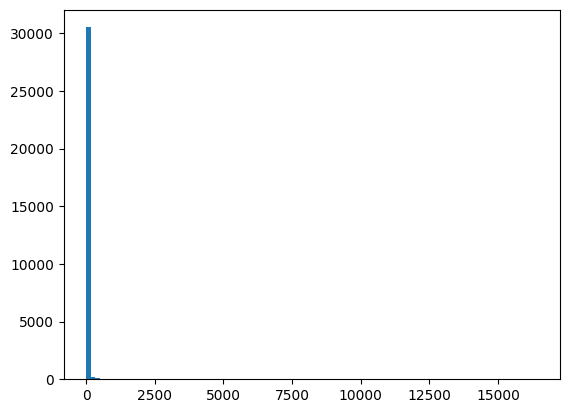

In [90]:
import matplotlib.pylab as plt

plt.hist(df_agg_playtime['avg_playtime'], bins=100);


In [91]:
df_agg_playtime.describe()

,AppID,user_id,playtime_forever,avg_playtime
count,30859.00,30859.00,30859.00,30859.00
mean,849266.42,103.60,169794.38,11.32
std,560650.56,263.26,3641719.79,113.46
min,10.00,1.00,0.00,0.00
25%,433685.00,6.00,197.00,0.29
50%,692830.00,28.00,2447.00,1.89
75%,1165250.00,87.00,19812.50,4.79
max,2690800.00,9197.00,570192698.00,16416.42


In [92]:
# Identify the outlier (assuming it is the maximum value in 'avg_playtime')
outlier_value = df_agg_playtime['avg_playtime'].max()

# Display the row with the outlier
outlier_row = df_agg_playtime[df_agg_playtime['avg_playtime'] == outlier_value]
print(outlier_row)


        AppID  user_id  playtime_forever  avg_playtime
11184  547900        2           1969971      16416.42


In [93]:
# Remove the outlier from the dataset
df_no_outlier = df_agg_playtime[df_agg_playtime['avg_playtime'] != outlier_value]

# Print the number of rows before and after removing the outlier
print(f"Original row count: {len(df_agg_playtime)}")
print(f"Row count after removing the outlier: {len(df_no_outlier)}")


Original row count: 30859
Row count after removing the outlier: 30858


In [94]:
df_no_outlier


,AppID,user_id,playtime_forever,avg_playtime
0,10,2969,44860086,251.82
1,20,2121,2785618,21.89
2,30,1813,3260364,29.97
3,40,1773,1623461,15.26
4,50,2181,752213,5.75
...,...,...,...,...
30854,2671970,27,7719,4.76
30855,2675660,3,0,0.00
30856,2677370,3,0,0.00
30857,2684790,37,235,0.11


In [95]:
games['Price'].value_counts(ascending=True)

0.77        1
1.29        1
8.39        1
2.89        1
22.99       1
         ... 
19.99     704
14.99     790
0.00     1224
4.99     1538
9.99     1779
Name: Price, Length: 153, dtype: int64

In [145]:
# Group by game_id, calculate the mean, and divide by 60 for hours
df_avg_playtime = df_user_playtime.groupby(by="AppID").mean()/60

# Drop the 'user_id' column
df_avg_playtime = df_avg_playtime.drop(columns=['user_id'])

# Rename the 'playtime_forever' column to 'avg_playtime'
df_avg_playtime = df_avg_playtime.rename(columns={'playtime_forever': 'avg_playtime'})

# Reset index to make game_id a regular column, renaming to 'AppID'
#df_avg_playtime = df_avg_playtime.reset_index().rename(columns={'game_id': 'AppID'})

# Display the result
df_avg_playtime.head()

,avg_playtime
AppID,
10,251.82
20,21.89
30,29.97
40,15.26
50,5.75


In [149]:
df_avg_playtime.to_csv("avg_play.csv")

In [146]:
df_avg_playtime.sort_values(by='avg_playtime', ascending=False).head()

,avg_playtime
AppID,
547900,16416.42
530300,5052.16
344340,3678.81
1998330,1805.36
844670,1792.86


<AxesSubplot:xlabel='AppID'>

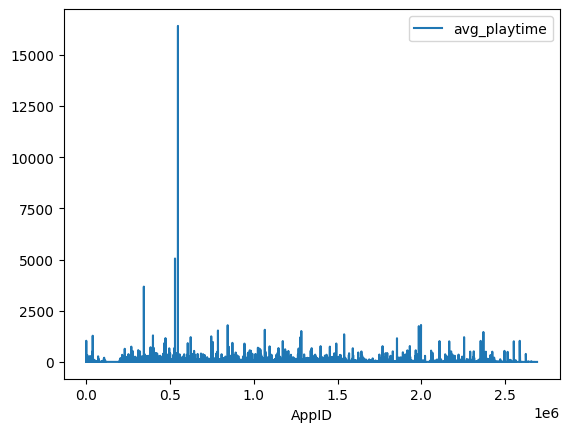

In [147]:
df_avg_playtime.plot()


In [137]:
df_avg_playtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30859 entries, 10 to 2690800
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   avg_playtime  30859 non-null  float64
dtypes: float64(1)
memory usage: 482.2 KB


In [97]:
#df_avg_playtime.to_csv("../data/avg_playtime.csv")

In [98]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13355
Columns: 148 entries, AppID to Sales
dtypes: bool(18), datetime64[ns](1), float64(102), int64(10), object(17)
memory usage: 13.5+ MB


In [99]:
null_percentage = games.isnull().mean() * 100

# Calculate the percentage of zero values in each column (for numeric columns)
zero_percentage = (games == 0).mean() * 100

In [100]:
null_percentage.sort_values(ascending=False)

Unnamed: 25                   100.00
Unnamed: 23                   100.00
Unnamed: 21                   100.00
Unnamed: 20                   100.00
Unnamed: 11                   100.00
                               ...  
GenreIsFreeToPlay               0.00
GenreIsSports                   0.00
GenreIsRacing                   0.00
GenreIsMassivelyMultiplayer     0.00
AppID                           0.00
Length: 148, dtype: float64

In [101]:
games_C= games.drop(columns=['Unnamed: 25','Unnamed: 23','Unnamed: 21','Unnamed: 20','Unnamed: 11'])

In [102]:
null_percentage = games_C.isnull().mean() * 100

# Calculate the percentage of zero values in each column (for numeric columns)
zero_percentage = (games_C == 0).mean() * 100

#null_percentage.sort_values(ascending=False)
zero_percentage.sort_values(ascending=False)

GenreIsMassivelyMultiplayer   97.08
GenreIsRacing                 96.44
GenreIsSports                 95.93
GenreIsFreeToPlay             95.00
RequiredAge                   94.91
                               ... 
DetailedDescrip                0.00
PCMinReqsText                  0.00
Release date                   0.00
Developers                     0.00
AppID                          0.00
Length: 143, dtype: float64

In [103]:
games_C= games.drop(columns=['RequiredAge'])

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C == 0).mean() * 100
zero_percentage.sort_values(ascending=False)


GenreIsMassivelyMultiplayer   97.08
GenreIsRacing                 96.44
GenreIsSports                 95.93
GenreIsFreeToPlay             95.00
IsFree                        92.15
DemoCount                     91.10
CategoryCoop                  90.04
GenreIsEarlyAccess            88.95
GenreIsRPG                    84.34
GenreIsSimulation             84.25
DLCCount                      83.88
Metacritic                    83.12
GenreIsStrategy               80.37
CategoryMultiplayer           73.97
Episodic                      73.75
Mods (require HL2)            73.75
Documentary                   73.75
Movie                         73.75
Short                         73.75
Tutorial                      73.75
Mods                          73.75
360 Video                     73.75
Steam Timeline                73.74
Accounting                    73.74
SteamVR Collectibles          73.71
Includes Source SDK           73.70
Photo Editing                 73.67
Web Publishing              

In [105]:
games_C= games.drop(columns=['DemoCount','GenreIsEarlyAccess','Metacritic','DLCCount','Episodic','Documentary','Movie','Short',
                             'Tutorial','Mods','360 Video','Steam Timeline','Accounting','SteamVR Collectibles'])

In [106]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C == 0).mean() * 100
zero_percentage.sort_values(ascending=False)

GenreIsMassivelyMultiplayer   97.08
GenreIsRacing                 96.44
GenreIsSports                 95.93
GenreIsFreeToPlay             95.00
RequiredAge                   94.91
IsFree                        92.15
CategoryCoop                  90.04
GenreIsRPG                    84.34
GenreIsSimulation             84.25
GenreIsStrategy               80.37
CategoryMultiplayer           73.97
Mods (require HL2)            73.75
Includes Source SDK           73.70
Photo Editing                 73.67
Web Publishing                73.65
Steam Turn Notifications      73.65
Game Development              73.64
Audio Production              73.63
Valve Anti-Cheat enabled      73.63
Video Production              73.59
Software Training             73.59
Commentary available          73.57
HDR available                 73.55
VR Support                    73.51
Gore                          73.50
Education                     73.49
Animation & Modeling          73.47
Violent                     

In [107]:
games_C1= games_C.drop(columns=['Mods (require HL2)','Includes Source SDK','Photo Editing','Web Publishing','Steam Turn Notifications','Game Development','Audio Production','Valve Anti-Cheat enabled',
                             'Video Production','Software Training','Commentary available','Gore'])

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C1 == 0).mean() * 100
zero_percentage.sort_values(ascending=False)

GenreIsMassivelyMultiplayer   97.08
GenreIsRacing                 96.44
GenreIsSports                 95.93
GenreIsFreeToPlay             95.00
RequiredAge                   94.91
IsFree                        92.15
CategoryCoop                  90.04
GenreIsRPG                    84.34
GenreIsSimulation             84.25
GenreIsStrategy               80.37
CategoryMultiplayer           73.97
HDR available                 73.55
VR Support                    73.51
Education                     73.49
Animation & Modeling          73.47
Violent                       73.39
Design & Illustration         73.37
GenreIsCasual                 73.34
Utilities                     73.22
LAN Co-op                     73.08
Remote Play on Phone          73.07
LAN PvP                       72.99
Remote Play on Tablet         72.88
VR Supported                  72.77
MMO                           72.59
Captions available            72.56
Massively Multiplayer         71.93
Steam Workshop              

In [109]:
games_C2= games_C1.drop(columns=['RequiredAge','LAN Co-op','Remote Play on Tablet','Remote Play on Phone','LAN PvP','Captions available','Steam Workshop','Includes level editor',
                             'Remote Play on TV','Shared/Split Screen Co-op','Required age','Stats','Shared/Split Screen PvP','Early Access','Online Co-op','VR Only',
                                'Tracked Controller Support','Shared/Split Screen','Remote Play Together','Steam Leaderboards','Steam Trading Cards','Partial Controller Support','Full controller support','Steam Cloud',
                                'Steam Achievements'])

In [110]:
games_C2.shape

(13303, 97)

In [111]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C2 == 0).mean() * 100
zero_percentage.sort_values(ascending=False)

GenreIsMassivelyMultiplayer   97.08
GenreIsRacing                 96.44
GenreIsSports                 95.93
GenreIsFreeToPlay             95.00
IsFree                        92.15
CategoryCoop                  90.04
GenreIsRPG                    84.34
GenreIsSimulation             84.25
GenreIsStrategy               80.37
CategoryMultiplayer           73.97
HDR available                 73.55
VR Support                    73.51
Education                     73.49
Animation & Modeling          73.47
Violent                       73.39
Design & Illustration         73.37
GenreIsCasual                 73.34
Utilities                     73.22
VR Supported                  72.77
MMO                           72.59
Massively Multiplayer         71.93
In-App Purchases              71.68
Cross-Platform Multiplayer    71.56
Racing                        71.01
Sports                        70.64
Free To Play                  69.63
GenreIsAdventure              67.56
Online PvP                  

In [113]:

games_C3= games_C2.drop(columns=['GenreIsIndie','achievements','recommendations',
                             'GenreIsMassivelyMultiplayer','GenreIsRacing','GenreIsSports'])

In [114]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C3 == 0).mean() * 100
zero_percentage.sort_values(ascending=False)

GenreIsFreeToPlay            95.00
IsFree                       92.15
CategoryCoop                 90.04
GenreIsRPG                   84.34
GenreIsSimulation            84.25
GenreIsStrategy              80.37
CategoryMultiplayer          73.97
HDR available                73.55
VR Support                   73.51
Education                    73.49
Animation & Modeling         73.47
Violent                      73.39
Design & Illustration        73.37
GenreIsCasual                73.34
Utilities                    73.22
VR Supported                 72.77
MMO                          72.59
Massively Multiplayer        71.93
In-App Purchases             71.68
Cross-Platform Multiplayer   71.56
Racing                       71.01
Sports                       70.64
Free To Play                 69.63
GenreIsAdventure             67.56
Online PvP                   67.29
Co-op                        66.23
PvP                          64.80
RecommendationCount          63.46
dlc_count           

In [115]:

games_C4= games_C3.drop(columns=['GenreIsFreeToPlay','IsFree','CategoryCoop','GenreIsRPG','GenreIsSimulation','GenreIsStrategy',
                                 'CategoryMultiplayer','Utilities','MMO'])

In [116]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

zero_percentage = (games_C4 == 0).mean() * 100
zero_percentage.sort_values(ascending=False)

HDR available                73.55
VR Support                   73.51
Education                    73.49
Animation & Modeling         73.47
Violent                      73.39
Design & Illustration        73.37
GenreIsCasual                73.34
VR Supported                 72.77
Massively Multiplayer        71.93
In-App Purchases             71.68
Cross-Platform Multiplayer   71.56
Racing                       71.01
Sports                       70.64
Free To Play                 69.63
GenreIsAdventure             67.56
Online PvP                   67.29
Co-op                        66.23
PvP                          64.80
RecommendationCount          63.46
dlc_count                    61.75
RPG                          61.13
Simulation                   60.77
Multi-player                 59.56
Metacritic score             58.01
GenreIsAction                57.81
Strategy                     57.65
DLC count                    55.52
Casual                       51.83
Adventure           

In [117]:
games_C4.to_csv("games_c4.csv")

In [ ]:
# Dropping redundant columns based on the comparison
columns_to_drop = [
    'Developers', 'developers',  # Developer related columns
    'Publishers', 'publishers',  # Publisher related columns
    'PriceCurrency',  # Price related
    'Recommendations',  # Reviews and ratings
    'DLC count',  # Redundant DLC count
    'Categories',  # Redundant category
    'Single-player',  # Redundant category
    'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual'  # Specific genres
]

# Drop the columns from the dataset
games_data_cleaned = games_C4.drop(columns=columns_to_drop)

# Show the resulting dataframe structure after dropping
games_data_cleaned.head()


In [119]:
# Step 1: Handle Missing Values
# We'll fill missing values in key numerical columns with the median value (a common choice for numerical data)
# For categorical columns, we can fill with 'Unknown' or mode depending on the context.

# Filling missing numerical columns with their median
numerical_columns_with_nulls = ['rating', 'TotalReviews', 'ReviewScore', 'Sales']
games_data_cleaned[numerical_columns_with_nulls] = games_data_cleaned[numerical_columns_with_nulls].fillna(games_data_cleaned[numerical_columns_with_nulls].median())

# Dropping columns that have no meaningful data (columns like 'Unnamed: 11', 'Unnamed: 20', etc.)
unnamed_columns = [col for col in games_data_cleaned.columns if 'Unnamed' in col]
games_data_cleaned = games_data_cleaned.drop(columns=unnamed_columns)

# Step 2: Handle Zero Values
# For binary columns (0/1), we will leave them as they are, but we will handle other zeros appropriately.

# Checking 'Price' column: Zeros likely indicate free games, so we'll keep them as-is.
# No action needed for binary columns either.

# Now the dataset is preprocessed. Let's display the structure and a sample of the cleaned data.
games_data_cleaned.info(), games_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13355
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       13303 non-null  int64         
 1   QueryName                   13303 non-null  object        
 2   DeveloperCount              13303 non-null  int64         
 3   RecommendationCount         13303 non-null  int64         
 4   PublisherCount              13303 non-null  int64         
 5   SteamSpyOwners              13303 non-null  int64         
 6   SteamSpyPlayersEstimate     13303 non-null  int64         
 7   PurchaseAvail               13303 non-null  bool          
 8   PlatformWindows             13303 non-null  bool          
 9   CategorySinglePlayer        13303 non-null  bool          
 10  ShortDescrip                11479 non-null  object        
 11  DetailedDescrip             12645 non-null  object    

(None,
    AppID                  QueryName  DeveloperCount  RecommendationCount  \
 0     10             Counter-Strike               1                68991   
 1     20      Team Fortress Classic               1                 2439   
 2     30              Day of Defeat               1                 2319   
 3     40         Deathmatch Classic               1                  888   
 4     50  Half-Life: Opposing Force               1                 2934   
 
    PublisherCount  SteamSpyOwners  SteamSpyPlayersEstimate  PurchaseAvail  \
 0               1        13033334                  9140731           True   
 1               1         5399140                   753627           True   
 2               1         7621102                  1709740           True   
 3               1         7498965                   789676           True   
 4               1         5399499                   705741           True   
 
    PlatformWindows  CategorySinglePlayer ShortDescrip  \
 

In [120]:
games_data_cleaned.to_csv("games_newC.csv")

In [121]:
# Cap the outliers at the 95th percentile to reduce their impact without removing them entirely
cap_percentile = 0.95

# Apply capping on the key features related to popularity
for feature in ['Sales', 'TotalReviews', 'RecommendationCount', 'SteamSpyOwners', 'SteamSpyPlayersEstimate']:
    cap_value = games_data_cleaned[feature].quantile(cap_percentile)
    games_data_cleaned[feature] = games_data_cleaned[feature].clip(upper=cap_value)

# Display the capped values and a sample of the dataset
games_data_cleaned[['Sales', 'TotalReviews', 'RecommendationCount', 'SteamSpyOwners', 'SteamSpyPlayersEstimate']].describe()


,Sales,TotalReviews,RecommendationCount,SteamSpyOwners,SteamSpyPlayersEstimate
count,13303.00,13303.00,13303.00,13303.00,13303.00
mean,431142.43,1142.61,371.17,80047.88,44287.18
std,1045299.61,2543.80,846.94,162517.12,95565.77
min,0.00,1.00,0.00,0.00,0.00
25%,5324.67,68.00,0.00,808.00,537.00
50%,37210.74,189.00,0.00,9506.00,4125.00
75%,173796.03,574.00,241.00,59544.00,27799.00
max,4252233.67,10420.80,3384.30,633983.00,380921.00


In [125]:
# Normalize the features again before recalculating the popularity score
# This will ensure all features are scaled between 0 and 1
games_data_cleaned[popularity_features] = scaler.fit_transform(games_data_cleaned[popularity_features])

# Recalculate the PopularityScore with normalized values
games_data_cleaned['PopularityScore'] = (
    0.4 * games_data_cleaned['Sales'] +
    0.3 * games_data_cleaned['TotalReviews'] +
    0.2 * games_data_cleaned['RecommendationCount'] +
    0.1 * games_data_cleaned['SteamSpyOwners']
)

# Display the top 5 rows with the normalized PopularityScore
games_data_cleaned[['QueryName', 'Sales', 'TotalReviews', 'RecommendationCount', 'PopularityScore']].head()


,QueryName,Sales,TotalReviews,RecommendationCount,PopularityScore
0,Counter-Strike,1.00,1.00,1.00,1.00
1,Team Fortress Classic,1.00,0.78,0.72,0.88
2,Day of Defeat,1.00,0.65,0.69,0.83
3,Deathmatch Classic,1.00,0.28,0.26,0.64
4,Half-Life: Opposing Force,1.00,1.00,0.87,0.97


In [128]:
games_data_cleaned[[
    'QueryName',
    'Sales',
    'TotalReviews',
    'RecommendationCount',
    'PopularityScore'
]].sort_values(by='PopularityScore',ascending=False).reset_index(drop=True).head()


,QueryName,Sales,TotalReviews,RecommendationCount,PopularityScore
0,Counter-Strike,1.00,1.00,1.00,1.00
1,Plague Inc: Evolved,1.00,1.00,1.00,1.00
2,Rise of the Tomb Raider,1.00,1.00,1.00,1.00
3,Skullgirls,1.00,1.00,1.00,1.00
4,SNOW,1.00,1.00,1.00,1.00


In [129]:
games_data_cleaned.head()

,AppID,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,PlatformWindows,CategorySinglePlayer,ShortDescrip,DetailedDescrip,PCMinReqsText,Release date,Windows,Metacritic score,Achievements,Genres,Year,Month,Day,Adventure,Casual,Indie,RPG,Free To Play,Action,Strategy,Simulation,Racing,Sports,Massively Multiplayer,Education,Violent,Design & Illustration,Animation & Modeling,Co-op,Cross-Platform Multiplayer,Family Sharing,HDR available,In-App Purchases,Multi-player,Online PvP,PvP,VR Support,VR Supported,age_ranking,Price,dlc_count,about_the_game,packages,categories,genres,positive,negative,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales,PopularityScore
0,10,Counter-Strike,1,1.00,1,1.00,1.00,True,True,False,NaN,Play the worlds number 1 online action game. E...,Minimum: 500 mhz processor 96mb ram 16mb video...,2000-11-01,True,88.00,0.00,Action,2000.00,11.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,9.99,0.00,Play the world's number 1 online action game. ...,"[{'title': 'Buy Counter-Strike', 'description'...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],230955.00,6024.00,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.00,149589.00,95.00,908.00,97.46,1.00,0.97,-5.35,1.00,1.00
1,20,Team Fortress Classic,1,0.72,1,1.00,1.00,True,True,False,NaN,One of the most popular online action games of...,Minimum: 500 mhz processor 96mb ram 16mb video...,1999-04-01,True,0.00,0.00,Action,1999.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,One of the most popular online action games of...,"[{'title': 'Buy Team Fortress Classic', 'descr...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],7075.00,1069.00,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.00,6045.00,89.00,64.00,86.87,0.78,0.87,-3.78,1.00,0.88
2,30,Day of Defeat,1,0.69,1,1.00,1.00,True,True,False,NaN,Enlist in an intense brand of Axis vs. Allied ...,Minimum: 500 mhz processor 96mb ram 16mb video...,2003-05-01,True,79.00,0.00,Action,2003.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Enlist in an intense brand of Axis vs. Allied ...,"[{'title': 'Buy Day of Defeat', 'description':...","['Multi-player', 'Valve Anti-Cheat enabled', '...",['Action'],6096.00,666.00,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.00,4038.00,97.00,36.00,90.15,0.65,0.90,-3.73,1.00,0.83
3,40,Deathmatch Classic,1,0.26,1,1.00,1.00,True,True,False,NaN,Enjoy fast-paced multiplayer gaming with Death...,Minimum: 500 mhz processor 96mb ram 16mb video...,2001-06-01,True,0.00,0.00,Action,2001.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Enjoy fast-paced multiplayer gaming with Death...,"[{'title': 'Buy Deathmatch Classic', 'descript...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],2438.00,514.00,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.00,2120.00,95.00,21.00,82.59,0.28,0.83,-3.30,1.00,0.64
4,50,Half-Life: Opposing Force,1,0.87,1,1.00,1.00,True,True,True,NaN,Return to the Black Mesa Research Facility as ...,Minimum: 500 mhz processor 96mb ram 16mb video...,1999-11-01,True,0.00,0.00,Action,1999.00,11.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Return to the Black Mesa Research Facility as ...,"[{'title': 'Buy Half-Life: Opposing Force', 'd...","['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],20991.00,1061.00,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.00,18994.00,95.00,269.00,95.

In [130]:
games_data_cleaned.head()

,AppID,QueryName,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,PurchaseAvail,PlatformWindows,CategorySinglePlayer,ShortDescrip,DetailedDescrip,PCMinReqsText,Release date,Windows,Metacritic score,Achievements,Genres,Year,Month,Day,Adventure,Casual,Indie,RPG,Free To Play,Action,Strategy,Simulation,Racing,Sports,Massively Multiplayer,Education,Violent,Design & Illustration,Animation & Modeling,Co-op,Cross-Platform Multiplayer,Family Sharing,HDR available,In-App Purchases,Multi-player,Online PvP,PvP,VR Support,VR Supported,age_ranking,Price,dlc_count,about_the_game,packages,categories,genres,positive,negative,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales,PopularityScore
0,10,Counter-Strike,1,1.00,1,1.00,1.00,True,True,False,NaN,Play the worlds number 1 online action game. E...,Minimum: 500 mhz processor 96mb ram 16mb video...,2000-11-01,True,88.00,0.00,Action,2000.00,11.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,9.99,0.00,Play the world's number 1 online action game. ...,"[{'title': 'Buy Counter-Strike', 'description'...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],230955.00,6024.00,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.00,149589.00,95.00,908.00,97.46,1.00,0.97,-5.35,1.00,1.00
1,20,Team Fortress Classic,1,0.72,1,1.00,1.00,True,True,False,NaN,One of the most popular online action games of...,Minimum: 500 mhz processor 96mb ram 16mb video...,1999-04-01,True,0.00,0.00,Action,1999.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,One of the most popular online action games of...,"[{'title': 'Buy Team Fortress Classic', 'descr...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],7075.00,1069.00,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.00,6045.00,89.00,64.00,86.87,0.78,0.87,-3.78,1.00,0.88
2,30,Day of Defeat,1,0.69,1,1.00,1.00,True,True,False,NaN,Enlist in an intense brand of Axis vs. Allied ...,Minimum: 500 mhz processor 96mb ram 16mb video...,2003-05-01,True,79.00,0.00,Action,2003.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Enlist in an intense brand of Axis vs. Allied ...,"[{'title': 'Buy Day of Defeat', 'description':...","['Multi-player', 'Valve Anti-Cheat enabled', '...",['Action'],6096.00,666.00,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.00,4038.00,97.00,36.00,90.15,0.65,0.90,-3.73,1.00,0.83
3,40,Deathmatch Classic,1,0.26,1,1.00,1.00,True,True,False,NaN,Enjoy fast-paced multiplayer gaming with Death...,Minimum: 500 mhz processor 96mb ram 16mb video...,2001-06-01,True,0.00,0.00,Action,2001.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Enjoy fast-paced multiplayer gaming with Death...,"[{'title': 'Buy Deathmatch Classic', 'descript...","['Multi-player', 'PvP', 'Online PvP', 'Shared/...",['Action'],2438.00,514.00,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.00,2120.00,95.00,21.00,82.59,0.28,0.83,-3.30,1.00,0.64
4,50,Half-Life: Opposing Force,1,0.87,1,1.00,1.00,True,True,True,NaN,Return to the Black Mesa Research Facility as ...,Minimum: 500 mhz processor 96mb ram 16mb video...,1999-11-01,True,0.00,0.00,Action,1999.00,11.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.99,0.00,Return to the Black Mesa Research Facility as ...,"[{'title': 'Buy Half-Life: Opposing Force', 'd...","['Single-player', 'Multi-player', 'Valve Anti-...",['Action'],20991.00,1061.00,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.00,18994.00,95.00,269.00,95.